<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорты**

In [105]:
import pandas as pd

In [4]:
import string
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [197]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Данные**

In [107]:
!wget https://www.dropbox.com/s/uyi7klg0rqt6h9c/validation.csv.zip?dl=0

--2020-06-26 08:38:56--  https://www.dropbox.com/s/uyi7klg0rqt6h9c/validation.csv.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uyi7klg0rqt6h9c/validation.csv.zip [following]
--2020-06-26 08:38:56--  https://www.dropbox.com/s/raw/uyi7klg0rqt6h9c/validation.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceee5634e9d2253001f152fc8ed.dl.dropboxusercontent.com/cd/0/inline/A6U5n8b5JEcN8cw24004FlHvn3ULA9s1hJNBOInhPBDAJECbkmaUhPrPOA8DucwQ-XfyrS3sgjTFChcEyr__1zdfU9rtybphW5eAf2D6NdYX5v1zuFw-QSowILX000rRwG0/file# [following]
--2020-06-26 08:38:56--  https://uceee5634e9d2253001f152fc8ed.dl.dropboxusercontent.com/cd/0/inline/A6U5n8b5JEcN8cw24004FlHvn3ULA9s1hJNBOInhPBDAJECbkmaUhPrPOA8DucwQ-XfyrS3sgjTFChcEyr__1zdfU9r

In [108]:
!wget https://www.dropbox.com/s/3tgmzibn8t95ua2/jigsaw-toxic-comment-train.csv.zip?dl=0

--2020-06-26 08:39:02--  https://www.dropbox.com/s/3tgmzibn8t95ua2/jigsaw-toxic-comment-train.csv.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3tgmzibn8t95ua2/jigsaw-toxic-comment-train.csv.zip [following]
--2020-06-26 08:39:02--  https://www.dropbox.com/s/raw/3tgmzibn8t95ua2/jigsaw-toxic-comment-train.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8522a2c940d93d14ae2ec66c62.dl.dropboxusercontent.com/cd/0/inline/A6W_VyITF9zoIcsrTAAwcDuQ-Iw0bF3-AwAvQP4FOHzPAq1SAvXULMLtuheEm5jbMmgyxJfUnWzvPC6LHfpuKRJ-rwM19cee_ujCm-_NrWCxdb90sYqNEI_sXLIyB_lHEBM/file# [following]
--2020-06-26 08:39:03--  https://uc8522a2c940d93d14ae2ec66c62.dl.dropboxusercontent.com/cd/0/inline/A6W_VyITF9zoIcsrTAAwcDuQ-Iw0bF3-AwAvQP4FOHz

In [109]:
!unzip jigsaw-unintended-bias-train.csv.zip?dl=0
!unzip test.csv.zip?dl=0

unzip:  cannot find or open jigsaw-unintended-bias-train.csv.zip?dl=0, jigsaw-unintended-bias-train.csv.zip?dl=0.zip or jigsaw-unintended-bias-train.csv.zip?dl=0.ZIP.

No zipfiles found.
unzip:  cannot find or open test.csv.zip?dl=0, test.csv.zip?dl=0.zip or test.csv.zip?dl=0.ZIP.

No zipfiles found.


In [110]:
!unzip validation.csv.zip?dl=0
!unzip jigsaw-toxic-comment-train.csv.zip?dl=0

Archive:  validation.csv.zip?dl=0
  inflating: validation.csv          
Archive:  jigsaw-toxic-comment-train.csv.zip?dl=0
  inflating: jigsaw-toxic-comment-train.csv  


# **Строка 1**


Анализ всех дополнительных колонок тональности (как проявляется тот или иной тип токсичности, как в данных это представлено, какие есть пограничные случаи) - 2.5 балла



In [114]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('punkt')
import json, os
from collections import Counter
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
toxic_data = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [112]:
sample = toxic_data.sample(frac=0.2, replace=True, random_state=1)

Нормализуем данные

In [115]:
def normalize(text):

  text = re.sub("\n|\t|\s\"", " ", text)
  for c in string.punctuation:
    text = text.replace(c, f' {c} ')
   
  return text

In [116]:
sample['normalized'] = sample['comment_text'].apply(lambda x: normalize(x))

In [195]:
sample.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,normalized
128037,acd47a6c06c4d1f8,Fuck Wikipedia!!! \n\nPeace (except to Wikipedia),1,1,1,0,0,0,Fuck Wikipedia ! ! ! Peace ( except to W...
208780,c40dc2b2890a95ab,::That is discussion among experts. 1965 war m...,0,0,0,0,0,0,: : That is discussion among experts . 1965...
5192,0dd47ea93d47e518,Re-adding anti-barnstar\n Anti-Barnstar,0,0,0,0,0,0,Re - adding anti - barnstar Anti - Barnstar
50057,85c6afcc7c206a1a,"""\nCopying to talk page. serenC """,0,0,0,0,0,0,""" Copying to talk page . serenC"
109259,484bf6015ebcb2e2,On edit: forgot to actually .,0,0,0,0,0,0,On edit : forgot to actually .


In [118]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44710 entries, 128037 to 56305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             44710 non-null  object
 1   comment_text   44710 non-null  object
 2   toxic          44710 non-null  int64 
 3   severe_toxic   44710 non-null  int64 
 4   obscene        44710 non-null  int64 
 5   threat         44710 non-null  int64 
 6   insult         44710 non-null  int64 
 7   identity_hate  44710 non-null  int64 
 8   normalized     44710 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


Посмотрим на корреляцию переменных

In [119]:
sample.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.287582,0.705843,0.159473,0.670094,0.277041
severe_toxic,0.287582,1.000000,0.375250,0.112835,0.346091,0.198051
obscene,0.705843,0.375250,1.000000,0.145366,0.735899,0.288693
threat,0.159473,0.112835,0.145366,1.000000,0.153113,0.122263
insult,0.670094,0.346091,0.735899,0.153113,1.000000,0.343810
identity_hate,0.277041,0.198051,0.288693,0.122263,0.343810,1.000000


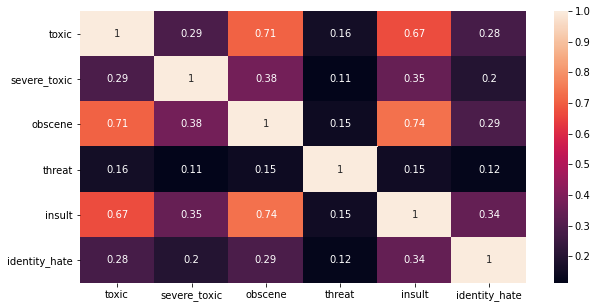

In [198]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=sample.corr(), 
            annot=True, ax=ax)
plt.show()

Самая большая корреляция наблюдается между "obscene" и "insult", а также между "toxic" и "obscene".

Рассмотрим токсичные и нетоксичные комментарии

In [210]:
toxic_comments = sample[sample.toxic==1]
for comment in toxic_comments.comment_text.head(5):
  print(comment)

Fuck Wikipedia!!! 

Peace (except to Wikipedia)
:::Yeah, it's all a huge conspiracy to turn the world into communist homosexuals.
How so, would you care to atleast give a concise justification of your statement or is it just an empty assertion coming from a pseudo-intellect?
MYSTERION IS CLYDE AND ANYONE WHO DOESN'T THINK SO IS A JACKASS
. 

KEEP YOUR ANTI-GREEK SHIT TO YOURSELF! GREEKWARRIOR IS BACK! EVEN THOUGH I HAVE BEEN EDITING BEFORE THAT EVEN!


In [211]:
non_toxic_comments = sample[sample.toxic==0]
for comment in non_toxic_comments.comment_text.head(5):
  print(comment)

::That is discussion among experts. 1965 war maybe 'UN ceasefire', 1999 war's extra note should link to aftermath of the article.
Re-adding anti-barnstar
 Anti-Barnstar
"
Copying to talk page. serenC "
On edit: forgot to actually .
Who is in charge of Russia? Putin or Medevev? I gather Putin is still the captain of the ship (he just kept the power made the Moscow White House the new Kremlin), whith Medevev as the honorary counsel.


Посмотрим на другие колонки

**1) Severe toxic.**

In [219]:
sev_toxic_comments = sample[sample.severe_toxic==1]
for comment in sev_toxic_comments.comment_text.head(5):
  print(comment)

Fuck Wikipedia!!! 

Peace (except to Wikipedia)
I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
GO F**K YOURSELF TOO! LIKE I GIVE A SHIT ABOUT A BAN!
DRMIES IS A F**CKING IDIOT!!!!!!
GO FUCK YOURSELF NIGGER


Количество перечесений severe toxic и toxic

In [214]:
severe_toxic = sample[sample.severe_toxic==1]
severe_toxic2 = severe_toxic[severe_toxic.toxic==1]
len(severe_toxic2)

381

In [217]:
for comment in severe_toxic2.comment_text.head(5):
  print(comment)

Fuck Wikipedia!!! 

Peace (except to Wikipedia)
I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
GO F**K YOURSELF TOO! LIKE I GIVE A SHIT ABOUT A BAN!
DRMIES IS A F**CKING IDIOT!!!!!!
GO FUCK YOURSELF NIGGER


Посмотрим на пересечение severe toxic и obscene

In [216]:
obs_sev = severe_toxic[severe_toxic.obscene ==1]
len(obs_sev)

372

In [218]:
for comment in obs_sev.comment_text.head(5):
  print(comment)

Fuck Wikipedia!!! 

Peace (except to Wikipedia)
I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
GO F**K YOURSELF TOO! LIKE I GIVE A SHIT ABOUT A BAN!
DRMIES IS A F**CKING IDIOT!!!!!!
GO FUCK YOURSELF NIGGER


Как мы видим, в трех случаях примеры совпали.

**2)Obscene**

In [220]:
obs_toxic_comments = sample[sample.obscene==1]
for comment in obs_toxic_comments.comment_text.head(5):
  print(comment)

Fuck Wikipedia!!! 

Peace (except to Wikipedia)
I agree, this guy is a piece of shit!
I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
oranjblud is an idiot. stop sticking up for him, redrose64. 86.40.176.99
" 

 Disrespectful?  I have her picture on my nighttable and I pray to her visage every night before going to bed that she will save my soul.  I live for the day that her icy cream will fill the nooks and crannies of my mouth, like so much butter on a still-warm English muffin.  However, despite my abject faith in her, she don't get a Wikipedia article.  Life's a bitch sometimes.  ||  "


Пересечение obscene и insult, между которыми очень больше значение корреляции

In [222]:
obscene_toxic = sample[sample.obscene==1]
ins_obs_toxic = obscene_toxic[obscene_toxic.insult==1]
len(ins_obs_toxic)

1755

In [223]:
for comment in ins_obs_toxic.comment_text.head(5):
  print(comment)

I agree, this guy is a piece of shit!
I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
oranjblud is an idiot. stop sticking up for him, redrose64. 86.40.176.99
" 

 Disrespectful?  I have her picture on my nighttable and I pray to her visage every night before going to bed that she will save my soul.  I live for the day that her icy cream will fill the nooks and crannies of my mouth, like so much butter on a still-warm English muffin.  However, despite my abject faith in her, she don't get a Wikipedia article.  Life's a bitch sometimes.  ||  "
"

""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, s

**3)Threat**

У этого параметра довольно маленькое значение корреляции с другими колонками, однако все равно посмотрим количество пересечений и примеры.

In [224]:
threat_comment = sample[sample.threat==1]
for comment in threat_comment.comment_text.head(5):
  print(comment)

I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
"I hate your stupid guts, you shit-head! ""Praise be to Allah that I converted to Islam. It is only through him that we wake up and see the reality."" What reality? Perhaps an alternate one! Now you listen here, you Benedict Arnold; if you can't get your awful NPOV comments off of here, I will personally take a gun and blast you through your own damn computer screen! HA HA HA HA HA HAH AHAHAHAHHAHAHA! GET YOUR FRICKEN' ASS OFF OF WIKIPEDIA OR I WILL STICK YOUR HEAD IN A MICROWAVE! I KNOW WHO YOU ARE, ""ANONOYMOUS EDITOR""! YOUR NAME IS OSAMA BIN LADEN, AND YOU ARE REMAINING ANONOMYOUS SO THAT YOU CAN ESCAPE THE JUST PUNISHMENT YOU DESERVE! AAAAAAAAAAARRRRRRRRRGGGGGGG!   
 :"
, I hope your retarded kids get anal raped and murdered for having such a fag as a father. I'm gonna fuck your fat wife and trow her over the bridge. Consider yourself happy, anoth

Посмотрим пересечения с toxic. Их совсем немного.

In [225]:
threat_comment_tox = threat_comment[threat_comment.toxic==1]
len(threat_comment_tox)

129

Примеры threat c toxic и без toxic

In [227]:
for comment in threat_comment_tox.comment_text.head(5):
  print(comment)

I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
"I hate your stupid guts, you shit-head! ""Praise be to Allah that I converted to Islam. It is only through him that we wake up and see the reality."" What reality? Perhaps an alternate one! Now you listen here, you Benedict Arnold; if you can't get your awful NPOV comments off of here, I will personally take a gun and blast you through your own damn computer screen! HA HA HA HA HA HAH AHAHAHAHHAHAHA! GET YOUR FRICKEN' ASS OFF OF WIKIPEDIA OR I WILL STICK YOUR HEAD IN A MICROWAVE! I KNOW WHO YOU ARE, ""ANONOYMOUS EDITOR""! YOUR NAME IS OSAMA BIN LADEN, AND YOU ARE REMAINING ANONOMYOUS SO THAT YOU CAN ESCAPE THE JUST PUNISHMENT YOU DESERVE! AAAAAAAAAAARRRRRRRRRGGGGGGG!   
 :"
, I hope your retarded kids get anal raped and murdered for having such a fag as a father. I'm gonna fuck your fat wife and trow her over the bridge. Consider yourself happy, anoth

In [228]:
threat_comment_nontox = threat_comment[threat_comment.toxic==0]
len(threat_comment_nontox)

10

In [229]:
for comment in threat_comment_nontox.comment_text.head(5):
  print(comment)

@ Good! Just tell me how delete my account so I can get away from you and 's harassment and abuse. You two have made a powerful and unstoppable enemy once I find who your identities are and if you even come to Washington state. I will destroy you guys' life once I find your identities and you know what I am strong and powerful than you and I am not vandalizing pages like everyone else is on this site, just doing what anyone would do.
"

 Lock Down 

I don't know about the ""Bulgarian BULLSHIT season"", but don't be fooled from where exactly i connect. If i see you editing, or someone else you send, the DDA40X article one more time, you will spend the next few years in prison. I will arrange you a meeting with certain people for suspicions of terrorism. Yes. I can do that. A terror suspect nowadays, you can kiss your young life goodbye. If you file complaints and i'm banned, you and your naked ass will have the whole time in the world, in the cell block, to think what went wrong. 87.252

Нетоксичных примеров совсем немного(всего 10)

**4)Indentity_hate**

In [230]:
hate_comment = sample[sample.identity_hate==1]
for comment in threat_comment.comment_text.head(5):
  print(comment)

I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
"I hate your stupid guts, you shit-head! ""Praise be to Allah that I converted to Islam. It is only through him that we wake up and see the reality."" What reality? Perhaps an alternate one! Now you listen here, you Benedict Arnold; if you can't get your awful NPOV comments off of here, I will personally take a gun and blast you through your own damn computer screen! HA HA HA HA HA HAH AHAHAHAHHAHAHA! GET YOUR FRICKEN' ASS OFF OF WIKIPEDIA OR I WILL STICK YOUR HEAD IN A MICROWAVE! I KNOW WHO YOU ARE, ""ANONOYMOUS EDITOR""! YOUR NAME IS OSAMA BIN LADEN, AND YOU ARE REMAINING ANONOMYOUS SO THAT YOU CAN ESCAPE THE JUST PUNISHMENT YOU DESERVE! AAAAAAAAAAARRRRRRRRRGGGGGGG!   
 :"
, I hope your retarded kids get anal raped and murdered for having such a fag as a father. I'm gonna fuck your fat wife and trow her over the bridge. Consider yourself happy, anoth

In [232]:
hate_comment_nontox = threat_comment[threat_comment.toxic==0]
len(threat_comment_tox)

129

In [233]:
for comment in hate_comment_nontox.comment_text.head(5):
  print(comment)

@ Good! Just tell me how delete my account so I can get away from you and 's harassment and abuse. You two have made a powerful and unstoppable enemy once I find who your identities are and if you even come to Washington state. I will destroy you guys' life once I find your identities and you know what I am strong and powerful than you and I am not vandalizing pages like everyone else is on this site, just doing what anyone would do.
"

 Lock Down 

I don't know about the ""Bulgarian BULLSHIT season"", but don't be fooled from where exactly i connect. If i see you editing, or someone else you send, the DDA40X article one more time, you will spend the next few years in prison. I will arrange you a meeting with certain people for suspicions of terrorism. Yes. I can do that. A terror suspect nowadays, you can kiss your young life goodbye. If you file complaints and i'm banned, you and your naked ass will have the whole time in the world, in the cell block, to think what went wrong. 87.252

In [231]:
hate_comment_tox = threat_comment[threat_comment.toxic==1]
len(threat_comment_tox)

129

In [234]:
for comment in hate_comment_tox.comment_text.head(5):
  print(comment)

I am going to fucking kill you, you wanker. I am going to find out where you live, slaughter your family and then torture you to death.
"I hate your stupid guts, you shit-head! ""Praise be to Allah that I converted to Islam. It is only through him that we wake up and see the reality."" What reality? Perhaps an alternate one! Now you listen here, you Benedict Arnold; if you can't get your awful NPOV comments off of here, I will personally take a gun and blast you through your own damn computer screen! HA HA HA HA HA HAH AHAHAHAHHAHAHA! GET YOUR FRICKEN' ASS OFF OF WIKIPEDIA OR I WILL STICK YOUR HEAD IN A MICROWAVE! I KNOW WHO YOU ARE, ""ANONOYMOUS EDITOR""! YOUR NAME IS OSAMA BIN LADEN, AND YOU ARE REMAINING ANONOMYOUS SO THAT YOU CAN ESCAPE THE JUST PUNISHMENT YOU DESERVE! AAAAAAAAAAARRRRRRRRRGGGGGGG!   
 :"
, I hope your retarded kids get anal raped and murdered for having such a fag as a father. I'm gonna fuck your fat wife and trow her over the bridge. Consider yourself happy, anoth

Количество токсичных и нетоксичных примеров с identity_hate в сэмпле оказалось одинаковое количество.

По примерам можно сказать, что obscene и severe toxic комментарий отличаются большим количеством излишней пунктуации и букв в верхнем регистре. 

# **Строка 2**

Бейзлайн модель из sklearn (векторайзер + модель) с отбором признаков (через l1 регуляризацию, на глаз через анализ важных параметров или через permutation importance) - 2 балл

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from matplotlib import pyplot
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(sample.normalized)
X = X.todense()
X = np.asarray(X)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y = sample.toxic
y = np.asarray(y)
y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(29955, 1000)

In [ ]:
lsvc = LinearSVC(C=7e-2, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [ ]:
X_train.shape

(29955, 132)

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)
predicted = clf.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test,predicted[:,1])

0.9125579754469557

Попробуем постепенно увеличивать С

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [ ]:
X_train.shape

(29955, 175)

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)
predicted = clf.predict_proba(X_test)
roc_auc_score(y_test,predicted[:,1])

0.9133957890670272

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lsvc = LinearSVC(C=50.0, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)
predicted = clf.predict_proba(X_test)
roc_auc_score(y_test,predicted[:,1])

0.9222301365011911

In [ ]:
X_train.shape

(29955, 996)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lsvc = LinearSVC(C=1000.0, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [ ]:
X_train.shape

(29955, 1000)

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)
predicted = clf.predict_proba(X_test)
roc_auc_score(y_test,predicted[:,1])

0.9222579303758074

При С = 1000 получилось достичь лучших результатов, однако не произошел отбор переменных, поэтому лучше остановиться на меньшем значении С.  
Посмотрим на коэффициенты самой первой модели. Занулилось почти 870 параметров.



In [ ]:
clf.coef_

array([[-1.67109843, -1.61743157, -1.71079683, -1.7453293 ,  1.65817494,
         1.24279167,  1.30027784, -1.1479229 ,  1.82179602, -1.85694144,
        -1.10882356, -1.74270268,  5.63226614, -1.64104513,  2.03716768,
         2.57193257,  5.06720697,  4.35806545, -1.69056252, -0.79862236,
        -1.15252429, -1.72229965,  1.88203033, -1.0974689 , -1.12287624,
         3.50508542, -1.58312137,  4.53109046,  3.32406147,  3.00204008,
        -1.53796293,  1.14766346,  1.93541714,  1.43932002, -1.09934837,
        -1.90824025, -0.97659918,  3.76284162,  3.83615461,  2.59591881,
        -1.74505933, -0.85873674,  8.59654789,  7.30791248,  4.24861673,
         1.81906136,  1.76799501, -1.39934788,  3.20317026, -1.36923172,
         0.71532079,  3.56730077, -1.75111519,  0.94541894,  1.63827317,
        -1.13182223,  1.10254293, -2.70537391,  1.68866407, -2.07136486,
         1.71493667, -1.00486184,  1.42236388,  1.57627595, -1.3769251 ,
         2.15816917,  1.54617451, -2.15757214,  1.6

# **Строка 3**

Стакинг бустингов (как минимум 2 уровня xboost/catboost/lightgbm, можно использовать публичные кернелы любых соревнований) - 3 балла

In [ ]:
import xgboost
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn.model_selection
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(29955, 1000)

Я пробовала разные параметры lgbm и xgb_model, а также меняла количество cv. Такие параметры показали лучший результат. 

In [ ]:
lgbm = LGBMClassifier(learning_rate=1e-2, n_estimators=1000, silent = False)
xgb_model = xgboost.XGBClassifier(learning_rate=1e-2, n_estimators=1000, verbosity=3)
lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[lgbm, xgb_model], use_probas= True,
                          meta_classifier=lr, cv = 5, verbose=5)

In [ ]:
sclf.fit(X_train, y_train)

y_pred = sclf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred[:, 1])

In [ ]:
print(auc)

0.9190097224905028


# **Строка 4**


Любая нейронная модель (минимум 5 слоев) с Dropout, Pooling и колбеками - 2 балла


In [ ]:
import tensorflow as tf

from tensorflow import keras

In [ ]:
def preprocess(text):
    tokens = text.split()
    tokens = [token for token in tokens]
    return tokens

In [ ]:
vocab = Counter()
for text in sample.normalized:
    vocab.update(preprocess(text))

In [ ]:
word2id = {'UNK':1, 'PAD':0}
for word in vocab:
  if vocab[word] > 5:
    word2id[word] = len(word2id)
id2word = {i:word for word, i in word2id.items()}

In [ ]:
MAX_LEN = 70

In [ ]:
X = []

for text in sample.normalized:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens][:MAX_LEN]
    X.append(ids)

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [ ]:
X.shape

(44710, 70)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
callback1 = tf.keras.callbacks.TerminateOnNaN()
callback2 = tf.keras.callbacks.EarlyStopping(patience=10,verbose=1)

In [ ]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))
embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=50)(inputs, )


conv1 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=2, activation='relu', padding='same')(embeddings)
conv2 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=2, activation='relu', padding='same')(conv1)
conv3 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=2, activation='relu', padding='same')(conv2)
conv4 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=2, activation='relu', padding='same')(conv3)
conv5 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=1, activation='relu', padding='same')(conv4)
pool1 = tf.keras.layers.AveragePooling1D()(conv5)
drop1 = tf.keras.layers.Dropout(0.05)(pool1)


flatten = tf.keras.layers.Flatten()(drop1)
dense = tf.keras.layers.Dense(64)(flatten)
relu = tf.keras.layers.ReLU()(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(relu)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=32,
         epochs=10,
        callbacks=[callback1,callback2]) # 462

Epoch 1/10
937/937 [==============================] - 12s 13ms/step - loss: 9.9939e-04 - accuracy: 0.9996 - val_loss: 0.8052 - val_accuracy: 0.9470
Epoch 2/10
937/937 [==============================] - 12s 13ms/step - loss: 8.0720e-04 - accuracy: 0.9997 - val_loss: 1.1297 - val_accuracy: 0.9455
Epoch 3/10
937/937 [==============================] - 12s 13ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.5002 - val_accuracy: 0.9383
Epoch 4/10
937/937 [==============================] - 13s 13ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.6660 - val_accuracy: 0.9461
Epoch 5/10
937/937 [==============================] - 12s 13ms/step - loss: 6.2121e-04 - accuracy: 0.9998 - val_loss: 0.6132 - val_accuracy: 0.9465
Epoch 6/10
937/937 [==============================] - 12s 13ms/step - loss: 4.5638e-04 - accuracy: 0.9998 - val_loss: 0.8209 - val_accuracy: 0.9455
Epoch 7/10
937/937 [==============================] - 12s 13ms/step - loss: 9.8456e-04 - accuracy: 0.9997 - val_loss: 0.

In [ ]:
predicted = model.predict(X_valid)

In [ ]:
predicted

array([[5.5169530e-13],
       [2.5479597e-08],
       [9.5141255e-14],
       ...,
       [4.2946979e-17],
       [1.9278281e-13],
       [1.4572178e-09]], dtype=float32)

In [ ]:
roc_auc_score(y_valid,predicted)

0.9063147361191595

# **Строка 5**

Поиск признаков, которые могут обобщаться на многоязычные данные (минимум 10 признаков рассмотрено,, обучать можно любую модель, оценивать нужно на validation.csv)  - 3 балла

In [177]:
from sklearn import preprocessing

In [149]:
train= toxic_data.sample(frac=0.2, replace=True, random_state=1)

In [150]:
train['normalized'] = train['comment_text'].apply(lambda x: normalize(x))

In [151]:
valid = pd.read_csv('validation.csv')

In [ ]:
valid.comment_text

0       Este usuario ni siquiera llega al rango de    ...
1       Il testo di questa voce pare esser scopiazzato...
2       Vale. Sólo expongo mi pasado. Todo tiempo pasa...
3       Bu maddenin alt başlığı olarak  uluslararası i...
4       Belçika nın şehirlerinin yanında ilçe ve belde...
                              ...                        
7995     Il fatto è che la pagina dei personaggi minor...
7996    El imbesil ete dela luna no se entera ni ostia...
7997    olum sız manyakmısınz siz adam sıze sanal yıld...
7998    El mapa del reinado de Alhaken esta ligerament...
7999    lasciami la tua email per favore. ad ogni modo...
Name: comment_text, Length: 8000, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [129]:
def upper_case_ratio(text):
  length_of_text = len(text)
  upper_case = 0
  for char in text:
    if char not in string.punctuation and char != " ":
      if char.upper() == char:
        upper_case += 1
  return upper_case/length_of_text

In [130]:
def number_ratio(text):
  nums =0
  for char in text:
    if char.isnumeric():
      nums+=1
  return nums/len(text)

In [131]:
def average_sent_length(text):
  sent_number = 0
  word_number = 0
  words = word_tokenize(text)
  sents = sent_tokenize(text)
  for sent in sents:
    sent_number+=1
  for word in words:
    word_number+=1
  return word_number/sent_number

In [132]:
def average_token_length(text):
  length = 0
  tokens=text.split(' ')
  if len(tokens) != 0:
    for token in tokens:
      length+= len(token)
  return length/len(tokens)

In [133]:
def punctuation_ratio(text):
  length_of_text = len(text)
  puncts = 0
  for char in text:
    if char in string.punctuation:
      puncts+=1
  return puncts/length_of_text

In [145]:
def longest_punct_chain(text):
    max_length = 0
    punct_number = 0
    tokens=text.split(' ')
    # print(tokens)
    for i in range(len(tokens)):
        if punct_number == 0 and tokens[i] in string.punctuation:
            punct_number = 1
        if i < 1:
            continue
        if tokens[i] == tokens[i-1] and tokens[i] in string.punctuation:
            punct_number+=1
        else:
            max_length = max(punct_number, max_length)
            punct_number = 0          
    return max(max_length, punct_number)

In [135]:
def longest_token(text):
    tokens=text.split()
    return max(map(len, tokens))

In [146]:
def bracket_number(text):
  br_number = 0
  sents = sent_tokenize(text)
  for s in sents:
    matches = re.findall("[{}]|[\(\)]|[\[\]]", s)
    # print(matches)
    for m in matches:
      br_number+=1
  return br_number

In [143]:
def compare_punct_num(text):
  n_sents = 1
  tokens = text.split()
  punct = ['!', '?', '.']
  for i in range(len(tokens)-1):
    if tokens[i] in punct:
      if tokens[i+1] not in string.punctuation:
         n_sents+=1
  puncts = 0
  for char in text:
    if char in string.punctuation:
      puncts+=1
  return puncts/n_sents

In [138]:
def text_length(text):
  return len(text)

In [152]:
train['text_length'] = train['normalized'].apply(text_length)
train['upper_case_ratio'] = train['normalized'].apply(upper_case_ratio)
train['average_sent_length'] = train['normalized'].apply(average_sent_length)
train['average_token_length'] = train['normalized'].apply(average_token_length)
train['punctuation_ratio'] = train['normalized'].apply(punctuation_ratio)
train['longest_punct_chain'] = train['normalized'].apply(longest_punct_chain)
train['longest_token'] = train['normalized'].apply(longest_token)
train['bracket_number'] = train['normalized'].apply(bracket_number)
train['compare_punct_num'] = train['normalized'].apply(compare_punct_num)
train['number_ratio'] = train['normalized'].apply(number_ratio)

valid['normalized'] = valid['comment_text'].apply(normalize)

valid['text_length'] = valid['normalized'].apply(text_length)
valid['upper_case_ratio'] = valid['normalized'].apply(upper_case_ratio)
valid['average_sent_length'] = valid['normalized'].apply(average_sent_length)
valid['average_token_length'] = valid['normalized'].apply(average_token_length)
valid['punctuation_ratio'] = valid['normalized'].apply(punctuation_ratio)
valid['longest_punct_chain'] = valid['normalized'].apply(longest_punct_chain)
valid['longest_token'] = valid['normalized'].apply(longest_token)
valid['bracket_number'] = valid['normalized'].apply(bracket_number)
valid['compare_punct_num'] = valid['normalized'].apply(compare_punct_num)
valid['number_ratio'] = valid['normalized'].apply(number_ratio)

In [160]:
del train['severe_toxic']
del train['threat']
del train['obscene']
del train['identity_hate']

In [164]:
del train['id']
del train['comment_text']
del train['normalized']

In [178]:
train.head(5)

,toxic,text_length,upper_case_ratio,average_sent_length,average_token_length,punctuation_ratio,longest_punct_chain,longest_token,bracket_number,compare_punct_num,number_ratio
128037,1,57,0.070175,2.75,2.222222,0.087719,3,9,2,2.5,0.000000
208780,0,145,0.075862,15.00,2.945946,0.055172,1,10,0,4.0,0.055172
5192,0,44,0.068182,9.00,3.500000,0.068182,1,8,0,3.0,0.000000
50057,0,35,0.057143,3.50,2.272727,0.057143,1,7,0,1.0,0.000000
109259,0,33,0.030303,7.00,2.400000,0.060606,1,8,0,2.0,0.000000


In [169]:
X = train.loc[:, train.columns != 'toxic']

In [168]:
y = train.toxic

In [188]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)

In [166]:
del valid['lang']
del valid['comment_text']
del valid['id']
del valid['normalized']

In [170]:
valid.head(5)

,toxic,text_length,upper_case_ratio,average_sent_length,average_token_length,punctuation_ratio,longest_punct_chain,longest_token,bracket_number,compare_punct_num,number_ratio
0,0,268,0.070896,12.250000,2.736111,0.029851,6,9,2,2.000000,0.044776
1,0,136,0.014706,11.500000,4.074074,0.022059,1,12,0,1.500000,0.000000
2,1,178,0.039326,6.800000,3.475000,0.033708,1,10,0,1.200000,0.011236
3,0,415,0.007229,20.666667,4.698630,0.026506,1,13,0,3.666667,0.000000
4,0,452,0.015487,7.555556,3.923913,0.028761,5,13,2,1.857143,0.004425


In [189]:
X_test = valid.loc[:, valid.columns != 'toxic']
X_test = scaler.transform(X_test)
y_test = valid.toxic

In [191]:
X_train

array([[-0.56434615,  0.10793722, -0.51326329, ...,  0.20532968,
        -0.04846088, -0.32471046],
       [-0.42985418,  0.16495557, -0.05703459, ..., -0.34471766,
         0.0056708 ,  1.55453226],
       [-0.58421429,  0.08794771, -0.28049355, ..., -0.34471766,
        -0.03041698, -0.32471046],
       ...,
       [-0.18226669, -0.36707083, -0.05703459, ..., -0.34471766,
        -0.04846088, -0.32471046],
       [-0.42068428, -0.46288904,  0.46436965, ..., -0.34471766,
         0.04175858, -0.32471046],
       [-0.50932671, -0.48787913, -0.01979143, ..., -0.34471766,
        -0.06650477, -0.32471046]])

In [192]:
clf = LogisticRegression().fit(X_train,y)
predicted = clf.predict_proba(X_test)

In [193]:
roc_auc_score(y_test,predicted[:,1])

0.6583583720623026

In [194]:
clf.coef_

array([[ 1.66563631e-04,  3.34390535e-01,  4.04942475e-02,
        -5.47452194e-01, -1.30667574e-01, -6.80692977e-01,
         7.15923311e-02, -8.59557891e-01,  8.98051242e-02,
        -2.02398646e-01]])